In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataset/PlayTennis.csv")
df.sample(4)

,Outlook,Temperature,Humidity,Wind,Play Tennis
5,Rain,Cool,Normal,Strong,No
0,Sunny,Hot,High,Weak,No
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes


In [3]:
# pre - processing
if(df.duplicated().sum() > 0):
    df.drop_duplicates(keep = 'first', inplace = True)

df.dropna(inplace = True)

In [4]:
x = df.drop(['Play Tennis'], axis = 1)
y = df.drop(x.columns, axis = 1)

In [5]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [6]:
x = x.apply(le1.fit_transform)
y = y.apply(le2.fit_transform)

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
import matplotlib.pyplot as plt

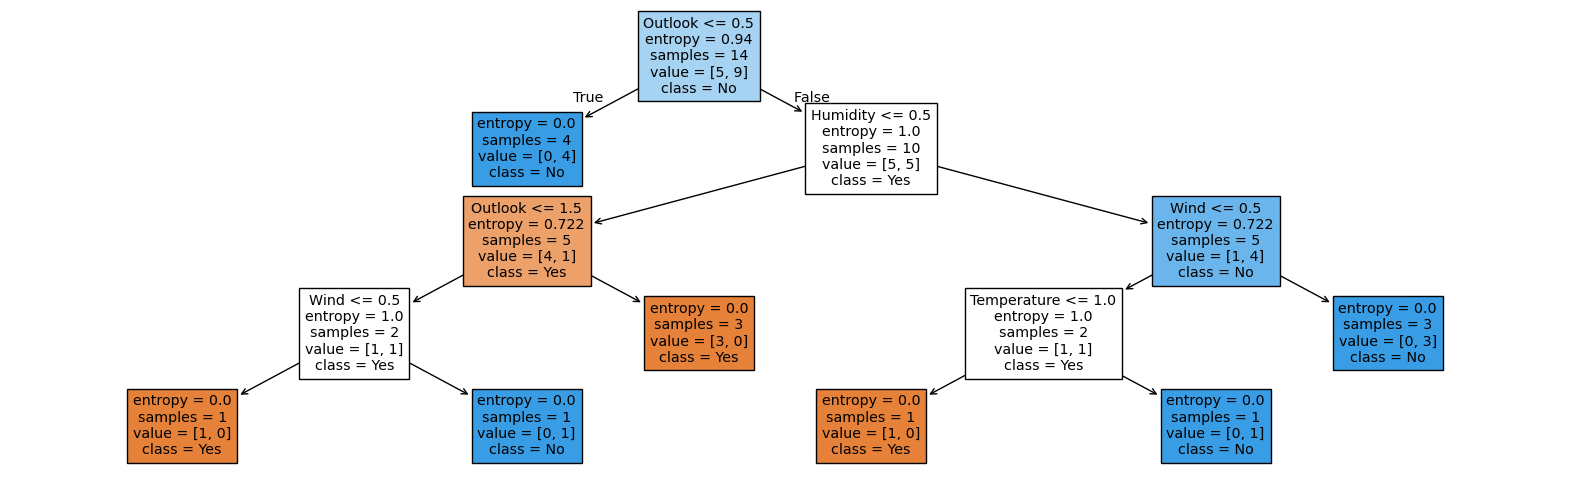

In [10]:
plt.figure(figsize = (20, 6))
plot_tree(model, feature_names = x.columns, class_names = ['Yes', 'No'],filled = True)
plt.show()

In [11]:
data = {
    'Outlook': ['Sunny', 'Overcast', 'Rain', 'Sunny'],
    'Temperature': ['Hot', 'Mild', 'Cool', 'Hot'],
    'Humidity': ['High', 'Normal', 'High', 'Normal'],
    'Wind': ['Strong', 'Weak', 'Weak', 'Weak'],
}
pred = pd.DataFrame(data)
pred

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Strong
1,Overcast,Mild,Normal,Weak
2,Rain,Cool,High,Weak
3,Sunny,Hot,Normal,Weak


In [12]:
pred = pred.apply(le1.fit_transform)
pred

,Outlook,Temperature,Humidity,Wind
0,2,1,0,0
1,0,2,1,1
2,1,0,0,1
3,2,1,1,1


In [13]:
res = model.predict(pred)

In [14]:
res = le2.inverse_transform(res)
res

array(['No', 'Yes', 'Yes', 'Yes'], dtype=object)